**Battle of neighborhoods**

***Identifying best location for establishing a hotel in Siolim,Goa (IN)***

__1.Importing the necessary libraries__

In [3]:
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

__1(a) Getting location through foursquare__

In [19]:
CLIENT_ID = 'XZWMEGZMVELJDU3C2TIUNUYY554V35I0W1BLYNTXOT4J3UER' # your Foursquare ID
CLIENT_SECRET = '11PEYYYRPG2EC02Z22GSGLUYO44OUK1TOPVRQHU21WF1GXRN' # your Foursquare Secret
VERSION = '20200622'
LIMIT = 100

address = "Siolim, Goa"

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude =location.latitude   #15.6243358 # location.latitude 
longitude =location.longitude #73.7660284 # location.longitude # 

Siolim='Siolim location : {},{}'.format(latitude,longitude)
print(Kanya)

Siolim location : 15.6243358,73.7660284


__1(b) Searching for hotels in Siolim,Goa within 1000 m radius__

In [20]:
search_query = 'hotel'
radius = 1000
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

__1(c) Send the GET Request of hotel json file and examine the results__

In [22]:
results_hotel = requests.get(url_hotel).json()
#results_hotel

__1(c) Get relevant parts of JSON and transform into a dataframe__

In [24]:
venues_hotel = results_hotel['response']['venues']
dataframe = json_normalize(venues_hotel)
print("There are {} hotels in Siolim,Goa".format(dataframe.shape[0]))

There are 4 hotels in Siolim,Goa


In [39]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
#dataframe_filtered
hotels_df=dataframe_filtered[['name','categories','distance','lat','lng','id']]
hotels_df.head()

,name,categories,distance,lat,lng,id
0,LA CASA Siolim Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",302,15.625266,73.763376,52cb716d498e1cae79ab09f5
1,Hotel Samrat,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",1024,15.615893,73.769829,4ef2cbfa9adfcbc0ad2746bf
2,hotel jakin,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",1110,15.615152,73.770076,4efabc07f790731254e292ae
3,The heritage Hotel Siolim,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",1139,15.614413,73.768651,51a1a679498e5eaf021644fc


**It is noteworthy that Siolim has only 4 hotels so there is less competition and there is room for more hotels in the vicinity**

**Lets us look at these hotels in a map**

In [42]:
hotels_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Siolim
# add a red circle marker to represent the core location of Siolim
folium.features.CircleMarker(
    [latitude, longitude],
    radius=15,
    color='red',
    popup='Siolim',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(hotels_map)

# add the hotels as blue circle markers
for lat, lng, label in zip(hotels_df.lat, hotels_df.lng, hotels_df.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hotels_map)
#display map
hotels_map

__2.Let us now analyze the distance of these hotels from the core location of Siolim*,distance is measured in M__

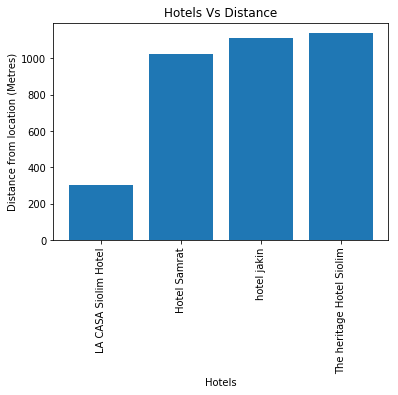

Average distance between hotels and core location is 893 metres


In [43]:
distance_hotel_df=dataframe_filtered[['name','categories','distance','lat','lng']].sort_values('distance')

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(distance_hotel_df.name))
    plt.bar(distance_hotel_df.name, distance_hotel_df.distance)
    plt.xlabel('Hotels')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_hotel_df.name,rotation=90)
    plt.title('Hotels Vs Distance')
    plt.show()
plot_bar_x()

print("Average distance between hotels and core location is {} metres".format(int(sum(hotels_df['distance'])/hotels_df.shape[0])))

**2.(a) Exploring other tourist spots around Siolim such as Churches,Beache etc.**

In [44]:
radius=1000
url_venues = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

In [46]:
import requests

results_venues = requests.get(url_venues).json()
'There are {} venues around Siolim.'.format(len(results_venues['response']['groups'][0]['items']))

'There are 20 venues around Siolim.'

__Get relevant parts and export it into a dataframe__

In [49]:
items_venues = results_venues['response']['groups'][0]['items']

In [57]:
dataframe_venues = json_normalize(items_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe_venues.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered_venues = dataframe_venues.loc[:, filtered_columns]


# clean columns
dataframe_filtered_venues.columns = [col.split('.')[-1] for col in dataframe_filtered_venues.columns]
df_venues=dataframe_filtered_venues[['name','categories','distance','lat','lng','id']]


df_venues.head()

,name,categories,distance,lat,lng,id
0,Navtara Siolim,"[{'id': '54135bf5e4b08f3d2429dfe0', 'name': 'M...",246,15.626395,73.765189,58d9124a8ee5602ddfcc6c9a
1,Soul food,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",609,15.620651,73.761820,52d3b24e498e819508b45822
2,Goagrill,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",273,15.622841,73.768054,565427c8498e1d769ba98340
3,Cafe Krish restaurant & juices,"[{'id': '4bf58dd8d48988d112941735', 'name': 'J...",988,15.631353,73.760374,531eae7e498eec00fd208f84
4,Juice Centr,"[{'id': '4bf58dd8d48988d112941735', 'name': 'J...",852,15.631401,73.762968,53207491498e784cf5288060


__It is noteworthy that there are a lot of eating joints and markets around our marked location,let us visualize them in a map__

In [58]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around Siolim

# add a red circle marker to represent Siolim
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Siolim',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df_venues.lat, df_venues.lng, df_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        #popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

**4. Results section**
4.a My hotel location
Final location is pointed at 8.07985,77.54973

This location is at Beach Road opposite to Gandhi Memorial and Kumari Temple.

Located at exact junction of two cross roads which can give more attention to people who passby.